**Model Building**

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

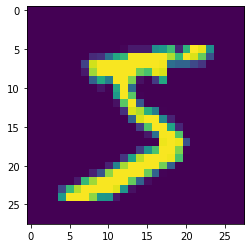

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2125 - accuracy: 0.9501 - val_loss: 0.0917 - val_accuracy: 0.9699
Epoch 2/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.1092 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.1062 - val_accuracy: 0.9771


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10616709291934967, 0.9771000146865845]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 112ms/step
[[2.6584330e-16 1.9687598e-20 5.5424262e-16 2.6204859e-15 3.1761294e-21
  1.4608350e-17 1.6782803e-21 1.0000000e+00 1.7685795e-12 7.8018870e-14]
 [1.5115666e-12 1.9270587e-14 1.0000000e+00 3.8468226e-16 2.2290705e-14
  9.8224971e-23 7.4702311e-10 6.9178544e-21 3.2697181e-15 2.3566002e-22]
 [4.0565504e-10 9.9998176e-01 8.7934668e-06 1.3257044e-10 1.2201390e-06
  1.7126040e-06 3.2023508e-09 5.9534440e-09 6.5690974e-06 3.4294978e-10]
 [1.0000000e+00 1.8132490e-21 2.5161597e-14 9.4527196e-17 2.9611520e-16
  1.7821992e-12 5.3637034e-12 4.7045496e-16 1.4647862e-09 5.3869004e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
